<a href="https://colab.research.google.com/github/Victorhcgo/202507_ProyectoModeloseleccionCCC/blob/main/Modelo_de_Selecci%C3%B3n_CCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install graphviz pydotplus
# pip install matplotlib scikit-learn seaborn

Bienvenidos al proyecto de analítica de datos para el prodicción de la deserción de empresarios en el programa de Prospera, de la Cámara de Comercio de Cali.

El proyecto esta dirigido por:

*   Edgar Julian Piniña
*   Juan Manual Franco
*   Victor Hugo Caicedo
*   Sebastin Dominguez
*   Nicolas Sandobal

## Análisis y transformación de datos
* Preparación de librerias y dataset
* Transformar variables categóricas (Encoder)
________________________________________
## Estrutura del proyecto ML
🔧 Prepocessor.py – carga y divisió de datos (Traing y Test).

🤖 training.py – entrenamiento del modelo.

🧪 testing.py – evaluación del modelo.

🧠 braing.py – orquestador del flujo (los anteriores tres pasos).

🧵 main.ipynb – ejecución principal.


# 📌 Preparación de Librerías y Dataset

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, make_scorer, f1_score

In [ ]:
# Diccionario con nombre de hiperparam como key, y posibles valores como value
params_grid = {'criterion':['gini','entropy'],
               'max_depth':list(range(5,31))}

# Particiona los datos en 5 para hacer el Cross Validation
kfoldcv = StratifiedKFold(n_splits=5)

# definimos al algoritmo de base, arbol de clasificaicon
dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)

# Definimos el objeto grid search
grid_cv = GridSearchCV(estimator=dt, # pasamos el estimador
                        param_grid=params_grid, # pasamos la grilla de parametros
                        scoring='f1',  # definimos la metrica de performance "f1_score"
                        cv=kfoldcv) # la forma en la que hacemos el split

In [ ]:
# Realizamos la busqueda de hiperparametros con Cross-validation y Grid-SearchCV
grid_cv.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
# Extraemos el mejor modelo y su performance
mejor_arbol = grid_cv.best_estimator_
mejor_performance = grid_cv.best_score_

print(f"Mejor arbol: {mejor_arbol}")
print(f"Mejor performance promedio (F1-score): {mejor_performance}")

### Evaluar la importancia del modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np

# Evaluar importancia por permutación
perm = permutation_importance(mejor_arbol, X, y, n_repeats=10, random_state=42)

#Crear DataFrame con resultados
feature_importancia = pd.DataFrame({
    'feature': X_val.columns.astype(str),  # asegurar que sean strings
    'importance': perm.importances_mean
}).sort_values(by='importance', ascending=False)

#Configurar colores (degradado azul)
plt.figure(figsize=(10, 6))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(feature_importancia)))

#Gráfico horizontal
plt.barh(feature_importancia['feature'], feature_importancia['importance'], color=colors)
plt.xlabel('Importancia por permutación')
plt.ylabel('Features')
plt.title('Importancia de variables (Permutation Importance)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# lista de características con importancia > 0
features_validados = feature_importancia[(feature_importancia['importance'] > 0)]['feature'].tolist()
features_validados
# Ahora vamos a realizar el mismo ejercicio pero solo vamos a dejar las variables con importancia distinta de 0
X_train_reduced = X_train[features_validados]
X_val_reduced = X_val[features_validados]

In [ ]:
# Diccionario con nombre de hiperparam como key, y posibles valores como value
params_grid = {'criterion':['gini','entropy'],
               'max_depth':list(range(5,31))}

# Particiona los datos en 5 para hacer el Cross Validation
kfoldcv = StratifiedKFold(n_splits=5)

# definimos al algoritmo de base, arbol de clasificaicon
dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)


# Definimos el objeto grid search
grid_cv_2 = GridSearchCV(estimator=dt, # pasamos el estimador
                        param_grid=params_grid, # pasamos la grilla de parametros
                        scoring='f1',  # definimos la metrica de performance "accuracy"
                        cv=kfoldcv) # la forma en la que hacemos el split

grid_cv_2.fit(X_train_reduced, y_train)


In [ ]:
# Extraemos el mejor modelo y su performance
mejor_arbol_2 = grid_cv_2.best_estimator_
mejor_performance_2 = grid_cv_2.best_score_

print(f"Mejor arbol: {mejor_arbol_2}")
print(f"Mejor performance promedio (F1-score): {mejor_performance}")
print(f"Mejor performance promedio (F1-score): {mejor_performance_2}")

In [ ]:
#Evaluamos el performance con los datos de validación
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Hacemos las predicciones con los datos de validación y las variables reducidas
y_pred = grid_cv_2.predict(X_val_reduced)

# Realizamos las métricas de accuracy, recall y precision
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print(f"El Accuracy es de: {accuracy:.2f}")
print(f"La Precision es de: {precision:.2f}")
print(f"El Recall es de: {recall:.2f}")
# Graficamos la matriz de confusión
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Cancelado', 'Cancelado'],
            yticklabels=['No Cancelado', 'Cancelado'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

#Limpiesa de datos

In [ ]:
class DataCleaner:
  def __init__ (self, df, var_cat_fact, var_drop_num, var_drop_cat, var_fillna,):
    self.df = df
    self.var_cat_fact = var_cat_fact
    self.var_drop_num = var_drop_num
    self.var_drop_cat = var_drop_cat
    self.var_fillna = var_fillna

  def factorize(self, df, var_cat_fact):
      for col in var_cat_fact:
          codes, _ = pd.factorize(df[col])
          self.df[col] = codes


  def drop_num(self):
    self.df = self.df.drop(self.var_drop_num, axis=1)

  def drop_cat(self):
    self.df = self.df.drop(self.var_drop_cat, axis=1)

  def fillna(self, df, var_fillna):
      """
      Rellena los NaN de las columnas indicadas:
        - Variables numéricas → mediana
        - Variables categóricas → moda (primer valor)
      Devuelve el DataFrame modificado.
      """

      # 1. Sub-DataFrame sólo con las columnas a imputar
      sub = self.df[self.var_fillna]

      # 2. Numéricas: medianas y relleno
      num_cols = sub.select_dtypes(include=[np.number]).columns
      if len(num_cols):
          medians = sub[num_cols].median()
          # fillna acepta un dict/Series para aplicar columna a columna
          self.df[num_cols] = sub[num_cols].fillna(medians)

      # 3. Categóricas: modas y relleno
      cat_cols = sub.select_dtypes(include=['object', 'category']).columns
      if len(cat_cols):
          # mode() devuelve un DataFrame, tomamos la primera fila
          modes = sub[cat_cols].mode(dropna=True).iloc[0]
          self.df[cat_cols] = sub[cat_cols].fillna(modes)

  def clear(self):
    self.factorize(self.df, self.var_cat_fact)
    self.drop_num()
    self.drop_cat()
    self.fillna(self.df, self.var_fillna)
    return self.df

#Definición de variables para la limpiesa de los datos.
var_cat_fact = ["cotiza_pension",
           "jefe_de_hogar",
           "trabaja_actualmente",
           "actualmente_cuenta_con",
           "identifica_la_diferencia_entre_costos_y_gastos",
           "ingresos_principales",
           "sabe_leer_y_escribir",
           "deserto"
           ]
var_drop_cat =  ["numero_de_identificacion",
                 "tipo_de_identificacion",
                 "nombre_completo",
                 "fecha_de_nacimiento",
                 "fecha_fortalecimiento",
                 "por_favor_escriba_su_nombre_completo",
                 "fecha_registro",
                 "ano",
                 "direccion",
                 "departamento_en_el_que_reside",
                 "ciudad_de_residencia",
                 "su_empresa_cuenta_con_el_registro_unico_tributario_rut",
                 "se_encuentra_registrado_en_la_camara_de_comercio_tiene_matricula_mercantil",
                 "test_de_fortalecimiento",
                 "fase"]
var_drop_num = ["anio_registro",
               "mes_registro",
               "anio_inicio_ventas"]

var_fillna  = [#var numéricas
              "porcentaje_conocimiento_costos_gastos",
               "dependientes",
               #var string
               "quien_toma_las_decisiones_en_su_empresa",
               "ventas_mensuales",
               "ahorro_ultimo_anio",
               "como_lleva_las_cuentas_en_su_empresa"]

# 📌 Preprocessor

In [ ]:
from sklearn.preprocessing import OneHotEncoder #, StandardScaler
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
import numpy as np
import joblib

class Preprocessor:
    def __init__(self, cat_cols=None, num_cols=None, corr_threshold = 0.1):
        self.cat_cols = cat_cols or []
        self.num_cols = num_cols or []
        self.corr_threshold = corr_threshold
        self.ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
        #self.scaler = StandardScaler()
        self.feature_names_ = []
        self.fitted = False

    def fit(self, df, target_col):

        if df[target_col].dtype == 'object':
           df[target_col], uniques = pd.factorize(df[target_col])
           self.label_mapping = dict(enumerate(uniques))  # num → str
           self.inverse_mapping = {v: k for k, v in self.label_mapping.items()}  # str → num
        else:
            self.label_mapping = None

        # OneHotEncoder para categóricas
        if self.cat_cols:
            self.ohe.fit(df[self.cat_cols])

        # Scaler para numéricas
        # if self.num_cols:
        #     self.scaler.fit(df[self.num_cols])

        # Selección por correlación
        corr = df.corr(numeric_only=True)
        if target_col in corr.columns:
            target_corr = corr[target_col].drop(target_col)
            selected = target_corr[abs(target_corr) >= self.corr_threshold].index.tolist()
            self.selected_num_cols_ = [col for col in selected if col in self.num_cols]
        else:
            self.selected_num_cols_ = self.num_cols

        self.fitted = True
        print(f"✅ Preprocessor ajustado. Num vars seleccionadas: {self.selected_num_cols_}")

    def transform(self, df):
        if not self.fitted:
            raise Exception("Debes usar .fit() primero.")

        dfs = []

        # Variables numéricas escaladas
        if self.selected_num_cols_:
          missing = [col for col in self.selected_num_cols_ if col not in df.columns]
          if missing:
                  raise ValueError(f"❌ Columnas no encontradas en el DataFrame: {missing}")
          df_scaled =  df[self.selected_num_cols_]
            #  scaled = self.scaler.transform(df[self.selected_num_cols_])
            #  df_scaled = pd.DataFrame(scaled, columns=self.selected_num_cols_, index=df.index)
          dfs.append(df_scaled)

        # Variables categóricas codificadas
        if self.cat_cols:
            ohe_vals = self.ohe.transform(df[self.cat_cols])
            ohe_names = self.ohe.get_feature_names_out()
            df_ohe = pd.DataFrame(ohe_vals, columns=ohe_names, index=df.index)
            dfs.append(df_ohe)

        df_final = pd.concat(dfs, axis=1)
        self.feature_names_ = df_final.columns.tolist()
        self.df_final = df_final

        df_final.to_csv("datasetModelo.csv", index=False)
        print("\n💾 Archivo guardado ajustado (preprocessor) como 'datasetModelo.csv'")

        return df_final

    def fit_transform(self, df, target):
        self.fit(df, target)
        return self.transform(df)

    def save(self, path="preprocessor.pkl"):
        joblib.dump(self, path)
        print(f"💾 Preprocessor guardado en: {path}")

    @staticmethod
    def load(path="preprocessor.pkl"):
        return joblib.load(path)

# 🤖 training.py – entrenamiento del modelo.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib

class Trainer:
    def __init__(self, model_type='random_forest'):
        self.model_type = model_type
        self.model = None
        self.grid = None
        self.preprocessor = None

    def build_model(self):
        if self.model_type == 'decision_tree':
            return DecisionTreeClassifier(random_state=42)
        elif self.model_type == 'random_forest':
            return RandomForestClassifier(random_state=42)
        else:
            raise ValueError(f"Modelo '{self.model_type}' no soportado")

    def train(self, df, target, cat_cols, num_cols, corr_threshold=0.5, param_grid=None):
        # Separar X e y
        X = df.drop(columns=[target])
        y = df[target]

        # Preprocesamiento
        self.preprocessor = Preprocessor(cat_cols=cat_cols, num_cols=num_cols, corr_threshold=corr_threshold)
        X_processed = self.preprocessor.fit_transform(df, target)

        # Definir modelo base y grid search
        base_model = self.build_model()

        # Definir parámetros por defecto si no se pasan
        if param_grid is None:
            if self.model_type == 'random_forest':
                param_grid = {'n_estimators': [100], 'max_depth': [4, 6, 8]}
            elif self.model_type == 'decision_tree':
                param_grid = {'max_depth': [3, 5, 7]}

        self.grid = GridSearchCV(base_model, param_grid, cv=3)
        self.grid.fit(X_processed, y)

        self.model = self.grid.best_estimator_
        print(f"✅ Modelo entrenado. Mejor score: {self.grid.best_score_:.4f}")
        return self.model

    def predict(self, df):
        X = self.preprocessor.transform(df)
        return self.model.predict(X)

    def save(self, model_path="model.pkl", preproc_path="preprocessor.pkl"):
        joblib.dump(self.model, model_path)
        joblib.dump(self.preprocessor, preproc_path)
        print("💾 Modelo y preprocesador guardados en formato Joblib.")

# Comparación de modelos

In [ ]:
# 🔍 Comparador de modelos
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

class ModelComparer:
    def __init__(self, dt_model, rf_model, X_test, y_test):
        self.dt_model = dt_model
        self.rf_model = rf_model
        self.X_test = X_test
        self.y_test = y_test

    def plot_confusions(self):
        dt_pred = self.dt_model.predict(self.X_test)
        rf_pred = self.rf_model.predict(self.X_test)

        fig, axs = plt.subplots(1, 2, figsize=(12, 5))
        sns.heatmap(confusion_matrix(self.y_test, dt_pred), annot=True, fmt="d", ax=axs[0], cmap="Blues")
        axs[0].set_title("Decision Tree - Confusion Matrix")
        axs[0].set_xlabel("Predicted")
        axs[0].set_ylabel("Actual")

        sns.heatmap(confusion_matrix(self.y_test, rf_pred), annot=True, fmt="d", ax=axs[1], cmap="Greens")
        axs[1].set_title("Random Forest - Confusion Matrix")
        axs[1].set_xlabel("Predicted")
        axs[1].set_ylabel("Actual")
        plt.tight_layout()
        plt.show()

    def compare_accuracy(self):
        dt_acc = accuracy_score(self.y_test, self.dt_model.predict(self.X_test))
        rf_acc = accuracy_score(self.y_test, self.rf_model.predict(self.X_test))
        print(f"📈 Accuracy - Decision Tree: {dt_acc:.4f}")
        print(f"📈 Accuracy - Random Forest: {rf_acc:.4f}")

        sns.barplot(x=["Decision Tree", "Random Forest"], y=[dt_acc, rf_acc], palette="pastel")
        plt.title("Comparación de Accuracy")
        plt.ylim(0.8, 1.0)
        plt.show()

    def plot_feature_importances(self):
            feature_names = self.X_test.columns
            if hasattr(self.rf_model, 'named_steps') and 'clf' in self.rf_model.named_steps:
                rf_estimator = self.rf_model.named_steps['clf']
            else:
                rf_estimator = self.rf_model

            if hasattr(rf_estimator, 'feature_importances_'):
                importances = rf_estimator.feature_importances_
            else:
                print("❌ El modelo Random Forest no tiene el atributo feature_importances_.")
                return
            plt.figure(figsize=(8, 6))
            # Create a pandas Series for easier plotting with seaborn
            feature_importance_series = pd.Series(importances, index=self.feature_names)
            feature_importance_series = feature_importance_series.sort_values(ascending=False)
            sns.barplot(x=feature_importance_series.values, y=feature_importance_series.index)
            plt.title("Importancia de Características - Random Forest")
            plt.show()

    def plot_roc_curves(self):
        y_bin = label_binarize(self.y_test, classes=np.unique(self.y_test))
        n_classes = y_bin.shape[1]

        fig, axs = plt.subplots(1, 2, figsize=(14, 5))
        for model, ax, title in zip([self.dt_model, self.rf_model], axs, ['Decision Tree', 'Random Forest']):
            classifier = OneVsRestClassifier(model)
            y_score = classifier.fit(self.X_test, y_bin).predict_proba(self.X_test)
            for i in range(n_classes):
                fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
                roc_auc = auc(fpr, tpr)
                ax.plot(fpr, tpr, label=f"Clase {i} (AUC = {roc_auc:.2f})")
            ax.plot([0, 1], [0, 1], "k--")
            ax.set_title(f"Curvas ROC - {title}")
            ax.set_xlabel("FPR")
            ax.set_ylabel("TPR")
            ax.legend()
        plt.tight_layout()
        plt.show()

# 🧠 braing.py – orquestador del flujo.

In [ ]:
class BrainG:
    def __init__(self, model_type='random_forest'):
        self.model_type = model_type
        self.preprocessor = None
        self.trainer = Trainer(model_type=model_type)
        self.model = None

    def run(self):

        # 1. Cargar dataset completo
        dataset = pd.read_csv("base_imputada2.csv", delimiter=';')
        # Limpiesa de datos
        self.cleaner = DataCleaner(dataset, var_cat_fact, var_drop_num, var_drop_cat, var_fillna)
        self.df = self.cleaner.clear()
        self.num_cols = self.df.select_dtypes(include=["int", "float"]).columns.tolist()
        self.cat_cols = self.df.select_dtypes(include=["object", "datetime64"]).columns.tolist()
        self.target = "deserto"

        # 2. Separar para evaluación
        from sklearn.model_selection import train_test_split
        df_train, df_test = train_test_split(self.df, test_size = 0.2, stratify = self.df[self.target], random_state = 42)

        # 3. Inicializar y ajustar preprocesador (sin escalado)
        self.preprocessor = Preprocessor(cat_cols=self.cat_cols, num_cols=self.num_cols, corr_threshold=0.4)
        self.preprocessor.fit(df_train, target_col=self.target)

        X_train = self.preprocessor.transform(df_train)
        y_train = df_train[self.target]

        # 3. Entrenar con trainer (internamente hace fit_transform + GridSearchCV)
        self.model = self.trainer.train(df_train,
                                        target = self.target,
                                        cat_cols = self.cat_cols,
                                        num_cols = self.num_cols,
                                        corr_threshold = 0.1
                                        )

        self.preprocessor = self.trainer.preprocessor


        # # 4. Guardar modelos
        # self.trainer.save("model_final.pkl", "preproc_final.pkl")

        # 5. Evaluar
        # Convertir y_test de string a num usando mapping
        if hasattr(self.preprocessor, "inverse_mapping") and self.preprocessor.inverse_mapping:
            y_test = df_test[self.target].map(self.preprocessor.inverse_mapping)
        else:
            y_test = df_test[self.target]

        X_test = self.preprocessor.transform(df_test)
        y_test = df_test[self.target]
        y_pred = self.model.predict(X_test)

        from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
        print(f"\n📊 Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        #print("\n📋 Reporte de Clasificación:\n", classification_report(y_test, y_pred))

        cm = confusion_matrix(y_test, y_pred)
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
        plt.title("Matriz de Confusión - Test Set")
        plt.xlabel("Predicho")
        plt.ylabel("Real")
        plt.show()

        #### esta en construcción este parte del código... se debe revizar la importancia de eliminar las variables que no aportan al modelo.
        # from sklearn.inspection import permutation_importance
        # # 7. Evaluación de importancia de variables por permutación
        # from sklearn.inspection import permutation_importance
        # print("🔍 Calculando importancia por permutación...")
        # perm = permutation_importance(self.model, X_test, y_test, n_repeats=10, random_state=42)

        # importancia = pd.DataFrame({
        #     'feature': X_test.columns,
        #     'importance': perm.importances_mean
        # }).sort_values(by='importance', ascending=False)

        # # Mostrar resumen
        # print("📊 Importancia por permutación:\n", importancia)

        # # Filtrar features útiles
        # self.validated_features = importancia[importancia["importance"] > 0]["feature"].tolist()
        # print(f"✅ Features validados (importancia > 0): {self.validated_features}")

# 🧵 main.ipynb – ejecución principal.

✅ Preprocessor ajustado. Num vars seleccionadas: ['asistencia_a_talleres_empresariales', 'asistencia_a_evento', 'horas_de_asesorias']

💾 Archivo guardado ajustado (preprocessor) como 'datasetModelo.csv'
✅ Preprocessor ajustado. Num vars seleccionadas: ['asistencia_a_talleres_empresariales', 'asistencias_a_servicios_complementarios', 'asistencia_a_evento', 'horas_de_asesorias', 'porcentaje_conocimiento_costos_gastos']

💾 Archivo guardado ajustado (preprocessor) como 'datasetModelo.csv'
✅ Modelo entrenado. Mejor score: 0.9486

💾 Archivo guardado ajustado (preprocessor) como 'datasetModelo.csv'

📊 Accuracy: 0.9540


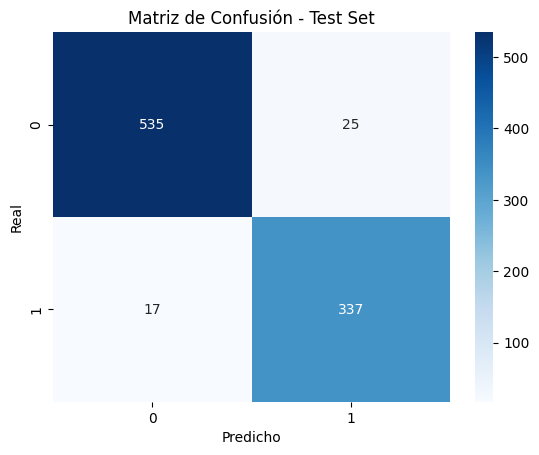

In [ ]:
# main.ipynb

import pandas as pd
import numpy as np

brain = BrainG(model_type = "random_forest")
brain.run()

NameError: name 'plt' is not defined

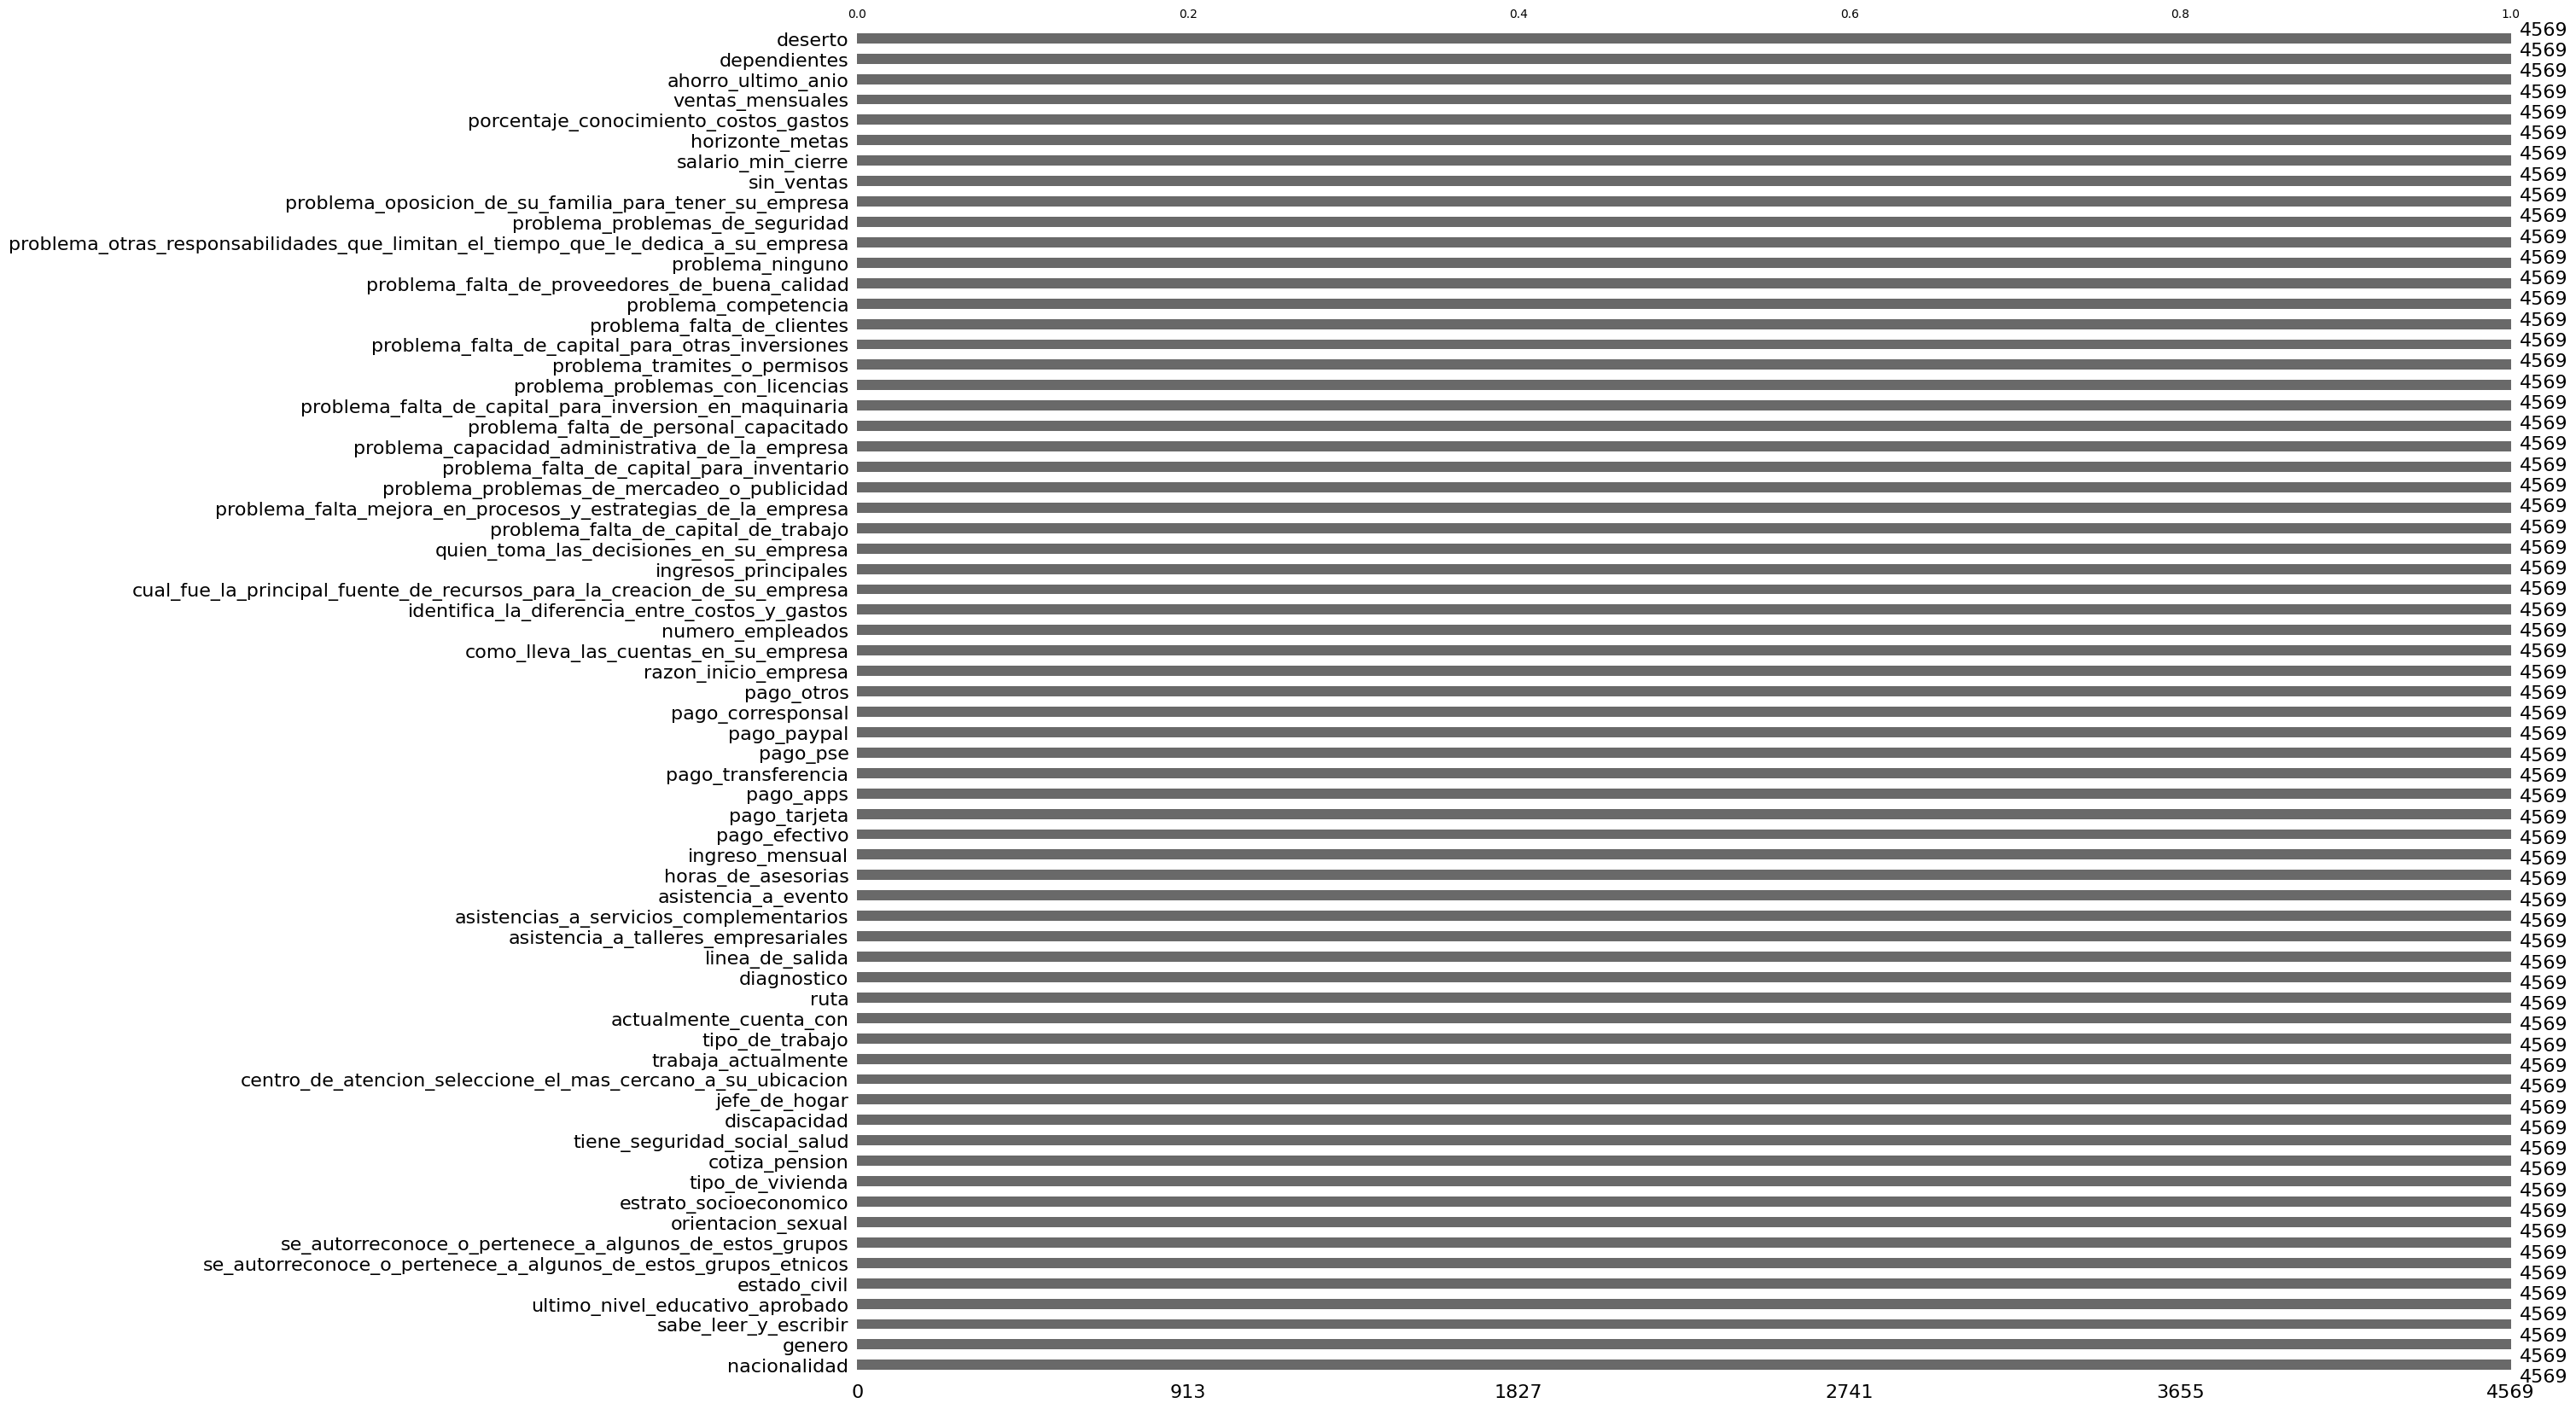

In [ ]:
import missingno as msno
# visualizing null values
msno.bar(df)
plt.show()

In [ ]:
import pandas as pd
df1 = pd.read_csv("base_imputada2.csv", delimiter=';')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4569 entries, 0 to 4568
Data columns (total 84 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   numero_de_identificacion                                                           4569 non-null   object 
 1   tipo_de_identificacion                                                             4569 non-null   object 
 2   nacionalidad                                                                       4569 non-null   object 
 3   nombre_completo                                                                    4569 non-null   object 
 4   genero                                                                             4569 non-null   object 
 5   sabe_leer_y_escribir                                                               4569 non-null   objec

In [ ]:
import pandas as pd
dfD = pd.read_csv("base_imputada.csv")
dfD.info()
